In [1]:
import pickle
import matplotlib.pyplot as plt

In [7]:
pdict = pickle.load(open('rnn_para_tuning_metrics.dict', 'rb'))

In [107]:
dbs = ['gene', 'transplant']
n_layers = [1,2,3,4,5]
n_units = [32,64,128,256,512]

metrics = {
    'gene':{
        'mae':{},
        'rmse':{},
        'ndcg':{}
    },
    'transplant':{
        'mae':{},
        'rmse':{},
        'ndcg':{}
    }
    
}

for db in dbs:
    for i in n_units:
        lines = []
        for j in n_layers:
            lines.append(pdict[(j,i)][db]['overall']['mae'])
        metrics[db]['mae'][i] = lines

        lines = []
        for j in n_layers:
            lines.append(pdict[(j,i)][db]['overall']['rmse'])
        metrics[db]['rmse'][i] = lines

        lines = []
        for j in n_layers:
            lines.append(pdict[(j,i)][db]['overall']['ndcg'])
        metrics[db]['ndcg'][i] = lines

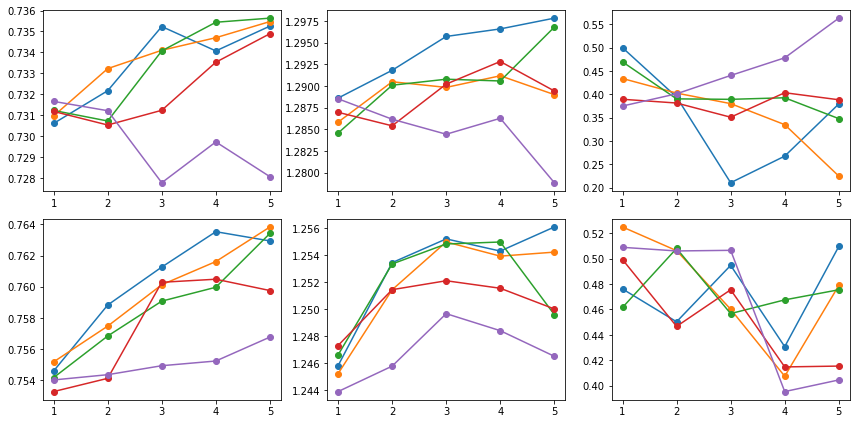

In [37]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,6))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

i = 0
for db, data in metrics.items():
    for met, units in data.items():
        for unit, values in units.items():
            axes[i].plot(range(1, 6), values, label='{} units'.format(units), marker='o')
            
#             if i % 3 == 0:
#                 axes[i].set_ylim([0.72, 0.77])
        i += 1
    

plt.tight_layout()
plt.show()

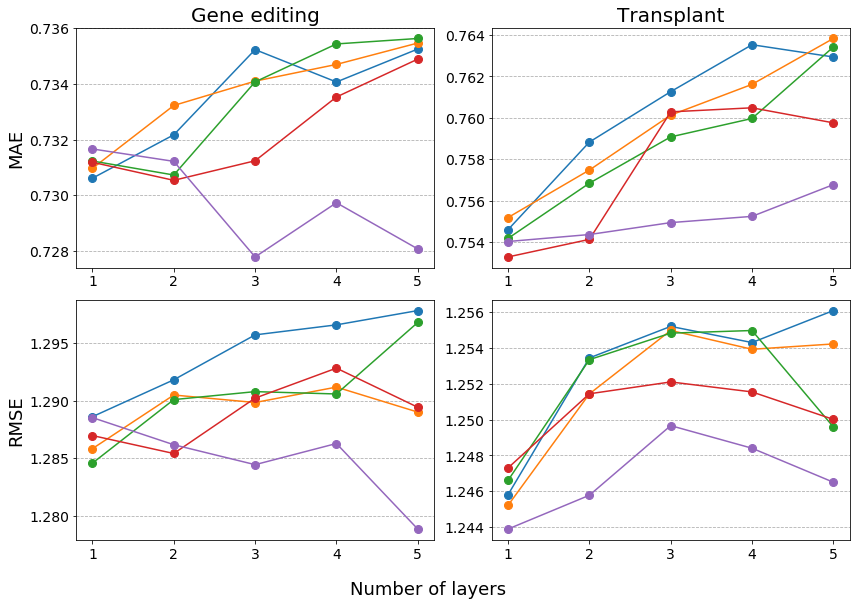

In [108]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))

axes = [ax1, ax3, ax2, ax4]

i = 0
for db, data in metrics.items():
    for met, units in data.items():
        if met == 'ndcg':
            continue
        for unit, values in units.items():
            axes[i].plot(range(1, 6), values, label='{} units'.format(unit), marker='o', markersize=8)
            axes[i].set_xticks(n_layers)
            axes[i].tick_params(axis='both', which='major', labelsize=14)
            axes[i].grid(axis='y', ls='--')
        i += 1
    
ax1.set_title('Gene editing', fontsize=20)
ax2.set_title('Transplant', fontsize=20)
ax1.set_ylabel('MAE', fontsize=18)
ax3.set_ylabel('RMSE', fontsize=18)
fig.text(0.5, -0.04, 'Number of layers', ha='center', fontsize=18)
# plt.legend(ncol=5, bbox_to_anchor=(0.6, -0.3))
plt.tight_layout()
plt.savefig('rnn_para_tuning.jpg')
plt.show()

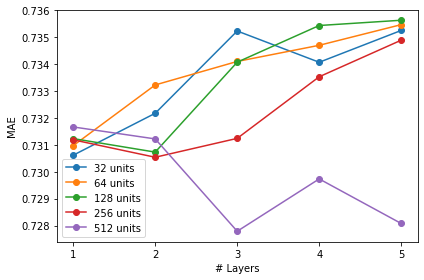

In [4]:
fig, ax = plt.subplots(1,1)
for k, v in unit_labels.items():
    ax.plot(range(1, 6), v, label='{} units'.format(k), marker='o')
    
ax.set_xticks(n_layers)
ax.set_xlabel('# Layers')
ax.set_ylabel('MAE')
ax.legend()
plt.tight_layout()
plt.show()

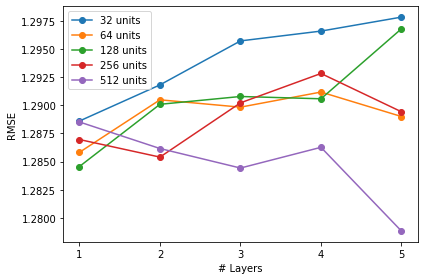

In [6]:
fig, ax = plt.subplots(1,1)
for k, v in unit_labels.items():
    ax.plot(range(1, 6), v, label='{} units'.format(k), marker='o')
ax.set_xticks(n_layers)
ax.set_xlabel('# Layers')
ax.set_ylabel('RMSE')
ax.legend()
plt.tight_layout()
plt.show()

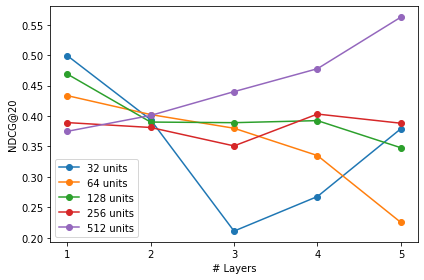

In [24]:
fig, ax = plt.subplots(1,1)
for k, v in unit_labels.items():
    ax.plot(range(1, 6), v, label='{} units'.format(k), marker='o')
ax.set_xticks(n_layers)
ax.set_xlabel('# Layers')
ax.set_ylabel('NDCG@20')
ax.legend()
plt.tight_layout()
plt.show()

In [21]:
db = 'transplant'
n_layers = [1,2,3,4,5]
n_units = [32,64,128,256,512]

unit_labels = {}
for i in n_units:
    lines = []
    for j in n_layers:
        lines.append(pdict[(j,i)][db]['overall']['mae'])
    unit_labels[i] = lines

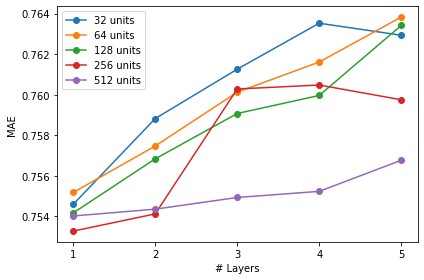

In [22]:
fig, ax = plt.subplots(1,1)
for k, v in unit_labels.items():
    ax.plot(range(1, 6), v, label='{} units'.format(k), marker='o')
    
ax.set_xticks(n_layers)
ax.set_xlabel('# Layers')
ax.set_ylabel('MAE')
ax.legend()
plt.tight_layout()
plt.show()

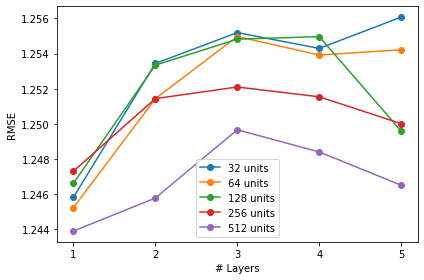

In [12]:
fig, ax = plt.subplots(1,1)
for k, v in unit_labels.items():
    ax.plot(range(1, 6), v, label='{} units'.format(k), marker='o')
    
ax.set_xticks(n_layers)
ax.set_xlabel('# Layers')
ax.set_ylabel('RMSE')
ax.legend()
plt.tight_layout()
plt.show()

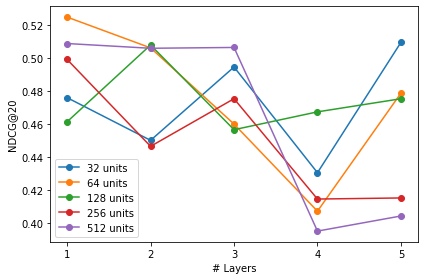

In [20]:
fig, ax = plt.subplots(1,1)
for k, v in unit_labels.items():
    ax.plot(range(1, 6), v, label='{} units'.format(k), marker='o')
    
ax.set_xticks(n_layers)
ax.set_xlabel('# Layers')
ax.set_ylabel('NDCG@20')
ax.legend()
plt.tight_layout()
plt.show()

In [16]:
unit_labels

{32: [0.7545955953107566,
  0.7588264672845032,
  0.7612612772390948,
  0.7635286478551929,
  0.7629363551993998],
 64: [0.7551812913517384,
  0.7574748565324336,
  0.7601268893080892,
  0.7616142821440681,
  0.7638304776377963],
 128: [0.7541742981711504,
  0.7568398383253105,
  0.7590763261205427,
  0.7599663076667078,
  0.7634177869577369],
 256: [0.7532775074360878,
  0.7541258847118886,
  0.7602857628774451,
  0.7604814147236668,
  0.7597552986322618],
 512: [0.7540230289434396,
  0.7543595959459333,
  0.754935370974444,
  0.7552369961218602,
  0.7567697059385168]}

In [10]:
pdict[(5,256)]['transplant']

{'overall': {'mae': 0.7664137474612192,
  'rmse': 1.2658264980784701,
  'ndcg': 0.47792175831117234,
  'mape': 3.530020830537134,
  'r2': 0.42786553559604845,
  'pearson': 0.6628438194052872,
  'acc': 0.33761416489766694},
 'annual': {'mae': array([0.75221554, 0.77403374, 0.74064068, 0.7617737 , 0.80340508]),
  'rmse': array([1.2981752 , 1.2848965 , 1.20867082, 1.21191684, 1.31190383]),
  'ndcg': array([0.07075485, 0.06030917, 0.02089212, 0.09912971, 0.1296002 ]),
  'mape': array([3.14448738, 3.8213683 , 3.06707442, 4.08166625, 3.53550781]),
  'r2': array([0.43161115, 0.43038921, 0.41701612, 0.4562721 , 0.40854981]),
  'pearson': array([0.66786   , 0.66281141, 0.6539436 , 0.68681572, 0.65562489]),
  'acc': array([0.34585244, 0.32369368, 0.34353449, 0.33458089, 0.34040932])}}

In [ ]:
mlp_metrics = {
    'gene':pdict[(3, 128)]['gene'],
    'transplant':pdict[(5,256)]['transplant']
}

In [ ]:
rnn_metrics = {
    'gene':pdict[(5, 512)]['gene'],
    'transplant':pdict[(1,512)]['transplant']
}

In [ ]:
pickle.dump(rnn_metrics, open('rnn_metrics.dict', 'wb'))

In [8]:
rnn_metrics = {
    'gene':pdict[(5, 512)]['gene'],
    'transplant':pdict[(1,512)]['transplant']
}

In [9]:
pickle.dump(rnn_metrics, open('rnn_metrics.dict', 'wb'))